In [1]:
import pandas as pd

# Ruta del archivo CSV
ruta_csv = r'C:\Users\USER\OneDrive\Escritorio\Maestría\mi_proyecto_ml\src\House_Rent_Dataset.csv'

# Leer el archivo CSV
try:
    data = pd.read_csv(ruta_csv)
    # Mostrar las primeras filas del dataset
    print(data.head())
except FileNotFoundError:
    print("El archivo no se encuentra en la ruta especificada. Por favor, verifica la ruta y el nombre del archivo.")

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

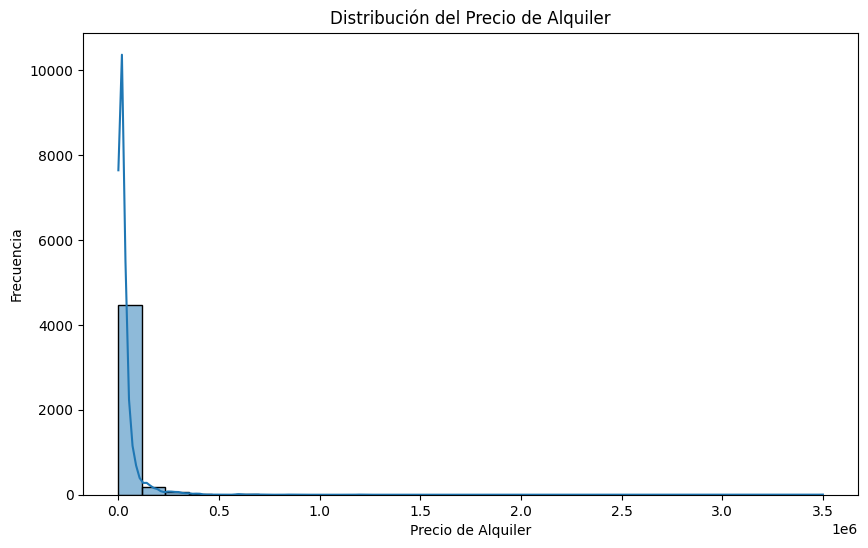

In [3]:
# Información general del dataset
#print(data.info())

# Estadísticas descriptivas
#print(data.describe())

# Visualización de algunas características
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución del precio de alquiler
plt.figure(figsize=(10, 6))
sns.histplot(data['Rent'], bins=30, kde=True)
plt.title('Distribución del Precio de Alquiler')
plt.xlabel('Precio de Alquiler')
plt.ylabel('Frecuencia')
plt.show()

In [5]:
data.shape

(4746, 2810)

In [ ]:
# Manejo de valores nulos
data = data.dropna()

# Codificación de variables categóricas
data = pd.get_dummies(data, drop_first=True)

# Normalización de datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Quitar el 2% superior e inferior en relación con la variable 'Rent'
lower_bound = data['Rent'].quantile(0.02)
upper_bound = data['Rent'].quantile(0.98)

data_filtered = data[(data['Rent'] > lower_bound) & (data['Rent'] < upper_bound)]

In [ ]:
#data_filtered.shape
#data=data_filtered 
data.shape


(4486, 2810)

In [ ]:
# Manejo de valores nulos
data = data.dropna()

# Codificación de variables categóricas
data = pd.get_dummies(data, drop_first=True)

# Normalización de datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# Codificación de variables categóricas (Si las hay)
data = pd.get_dummies(data, drop_first=True)

# Separar características (X) y variable objetivo (y)
X = data.drop(columns=["Rent"])  # Reemplaza "Rent" por la columna objetivo de tu dataset
y = data["Rent"].values.reshape(-1, 1)

# Normalización de datos
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Definir el modelo
model = Sequential()
model.add(Dense(256, input_dim=X_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))


NameError: name 'Sequential' is not defined